In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784',as_frame=False)

/Users/xwyang/anaconda3/lib/python3.10/site-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


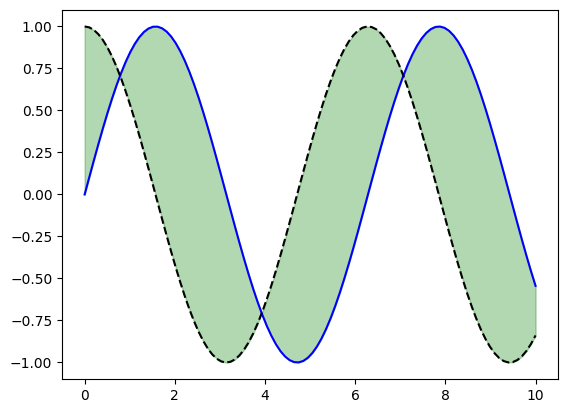

In [3]:

x = np.linspace(0, 10, 100)
y1 = np.sin(x)
y2 = np.cos(x)

plt.plot(x, y1, 'b-')  # Plot the curve
plt.plot(x,y2,'k--')
plt.fill_between(x,y1,y2,color='green',alpha=0.3)  # Fill between y and 0
plt.show()

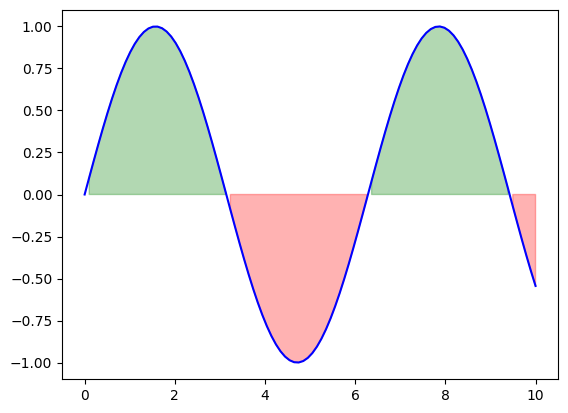

In [4]:
plt.plot(x, y1, 'b-')
plt.fill_between(x, y1, 0, where=(y1 > 0), color='green', alpha=0.3)
plt.fill_between(x, y1, 0, where=(y1 <= 0), color='red', alpha=0.3)
plt.show()

In [5]:
X,y = mnist.data,mnist.target

In [6]:
X[:10]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [7]:
X.shape,y.shape

((70000, 784), (70000,))

In [8]:
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [9]:
print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [10]:
def plot_image(image_data):
    image = image_data.reshape(28,28)
    plt.imshow(image,cmap='binary')
    plt.axis('off')

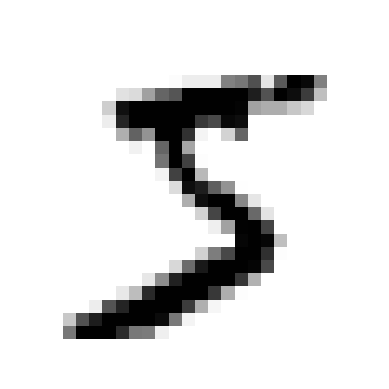

In [11]:
plot_image(X[0])
plt.show()

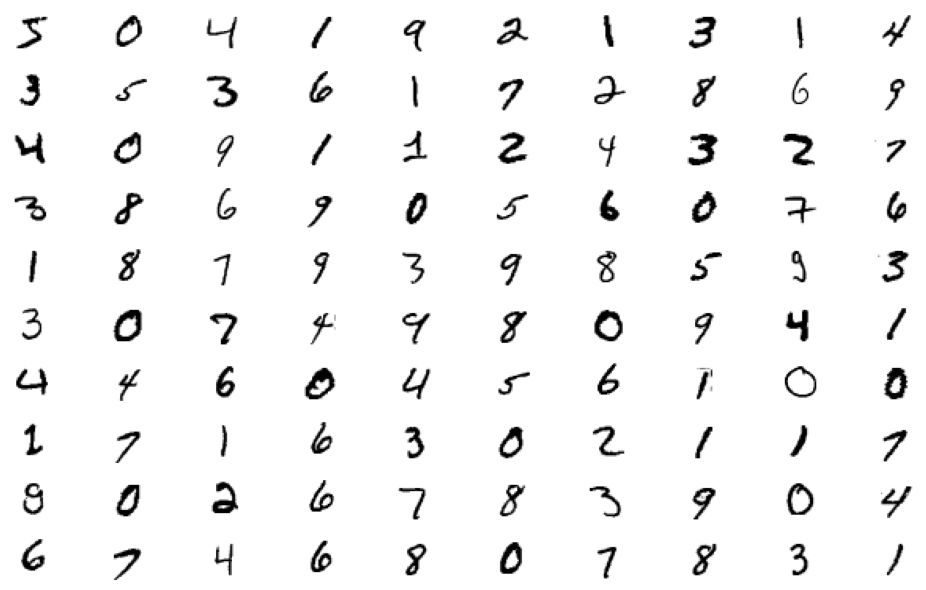

In [12]:
plt.figure(figsize=(10,6))
for i in range(100):
    plt.subplot(10,10,i+1)
    plot_image(X[i])
plt.tight_layout()
plt.show()


In [13]:
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV,cross_val_score

In [14]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [15]:
y_train_5 = (y_train=='5')
y_test_5 = (y_test=='5')

In [16]:
from sklearn.linear_model import SGDClassifier

In [17]:
sgd_clf = SGDClassifier(random_state=42)

In [18]:
sgd_clf.fit(X_train,y_train_5)

SGDClassifier(random_state=42)

In [27]:
sgd_clf.predict([X_test[-7]])

array([ True])

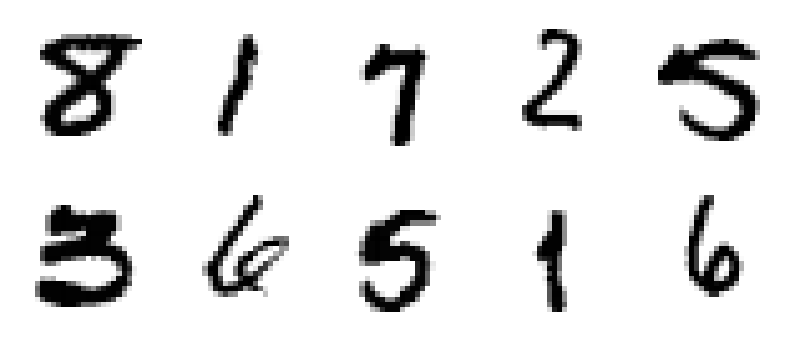

In [36]:
plt.figure(figsize=(8,4))
for i in range(10):
    plt.subplot(2,5,i+1)
    plot_image(X_test[-i])
plt.tight_layout()
plt.show()

In [28]:
y_pred = sgd_clf.predict(X_test)

In [29]:
cross_val_score(sgd_clf,X_train,y_train_5,cv=3,scoring='accuracy',n_jobs=-1)

array([0.97192907, 0.96855413, 0.96024858])

In [30]:
from sklearn.dummy import DummyClassifier,DummyRegressor

In [33]:
dummy_clf = DummyClassifier(strategy='most_frequent')
dummy_clf.fit(X_train,y_train_5)

DummyClassifier(strategy='most_frequent')

In [34]:
print(dummy_clf.predict(X_train))

[False False False ... False False False]


In [35]:
cross_val_score(dummy_clf,X_train,y_train_5,cv=3,scoring='accuracy',n_jobs=-1)

array([0.91000161, 0.91000161, 0.90999679])

In [37]:
from sklearn.metrics import confusion_matrix,accuracy_score,mean_squared_error

In [38]:
from sklearn.model_selection import cross_val_predict

In [39]:
y_trained_pred=cross_val_predict(sgd_clf,X_train,y_train_5,cv=3)

In [41]:
y_trained_pred

array([ True, False,  True, ..., False, False, False])

In [43]:
cm = confusion_matrix(y_trained_pred,y_train_5)

In [44]:
cm

array([[50287,  1180],
       [  673,  3860]])

In [45]:
confusion_matrix(y_pred,y_test_5)

array([[12620,   334],
       [  107,   939]])

 **(A). Confusion matrix** is a performance evaluation tool for **classification models** that shows how well your model predicts each class by comparing actual vs. predicted values. It helps identify **what types of mistakes** the model makes.

---

### **Structure of a Confusion Matrix**
For **binary classification** (2 classes: Positive `P` & Negative `N`), it’s a **2×2 matrix**:

|                     | **Predicted: N** | **Predicted: P** |
|---------------------|------------------|------------------|
| **Actual: N**       | True Negatives (TN) | False Positives (FP) |
| **Actual: P**       | False Negatives (FN) | True Positives (TP) |

- **Rows** = True (actual) classes  
- **Columns** = Predicted classes  

---

### **Key Metrics Derived from Confusion Matrix**
1. **Accuracy** = (TP + TN) / Total  
   - Overall correctness, but misleading for imbalanced data.  
2. **Precision** = TP / (TP + FP)  
   - "How many predicted positives are truly positive?"  
3. **Recall (Sensitivity)** = TP / (TP + FN)  
   - "How many actual positives were correctly predicted?"  
4. **F1-Score** = 2 × (Precision × Recall) / (Precision + Recall)  
   - Harmonic mean of precision and recall.  
5. **Specificity** = TN / (TN + FP)  
   - "How many actual negatives were correctly predicted?"  

---

### **Example in Python**
```python
from sklearn.metrics import confusion_matrix

y_true = [1, 0, 1, 1, 0, 1]  # Actual classes
y_pred = [1, 0, 0, 1, 0, 1]  # Predicted classes

cm = confusion_matrix(y_true, y_pred)
print(cm)
```
**Output** (for binary classification):  
```
[[2 0]  # TN | FP
 [1 3]] # FN | TP
```
- **TN=2**: Correctly predicted negatives.  
- **FP=0**: False alarms (predicted P, actual N).  
- **FN=1**: Missed positives (predicted N, actual P).  
- **TP=3**: Correctly predicted positives.  

---

### **When to Use It?**
1. **Imbalanced Data** (e.g., fraud detection, medical tests).  
2. **Multi-class Problems** (e.g., digit recognition).  
3. **Error Analysis** (e.g., seeing if a model confuses cats vs. dogs).  

For **multi-class**, the matrix expands (e.g., 3×3 for 3 classes).  

---

### **Visualizing the Confusion Matrix**
```python
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
```
This shows **which classes are most confused** (e.g., model often misclassifies "5" as "3").  



 **(B)** To identify the **types of errors** your classification model is making, you need to analyze the **confusion matrix** and interpret its components. Here’s a step-by-step guide:

---

### **1. Understand the Confusion Matrix Structure**
For **binary classification**, the matrix is structured as:

|                     | **Predicted: 0 (Negative)** | **Predicted: 1 (Positive)** |
|---------------------|----------------------------|----------------------------|
| **Actual: 0 (Negative)** | True Negatives (TN)        | False Positives (FP)        |
| **Actual: 1 (Positive)** | False Negatives (FN)       | True Positives (TP)         |

- **Rows**: Actual (true) classes.  
- **Columns**: Predicted classes.  

---

### **2. Identify the 4 Key Error Types**
#### **(A) False Positives (FP) – Type I Error**
- **What it means**: The model predicted **Positive (1)**, but the true class was **Negative (0)**.  
- **Example**: A spam email incorrectly classified as "Not Spam" (false negative in spam detection).  
- **Impact**: Could lead to missed critical cases (e.g., fraud missed in transactions).  

#### **(B) False Negatives (FN) – Type II Error**
- **What it means**: The model predicted **Negative (0)**, but the true class was **Positive (1)**.  
- **Example**: A harmless email marked as "Spam" (false positive).  
- **Impact**: Could cause unnecessary actions (e.g., blocking legitimate users).  

#### **(C) True Positives (TP) & True Negatives (TN)**
- These are **correct predictions** (not errors).  
- **TP**: Correctly predicted Positive.  
- **TN**: Correctly predicted Negative.  

---

### **3. How to Extract Errors in Python**
```python
from sklearn.metrics import confusion_matrix

y_true = [0, 0, 1, 1, 1, 0]  # Actual labels (0 = Negative, 1 = Positive)
y_pred = [0, 1, 0, 1, 1, 1]  # Predicted labels

cm = confusion_matrix(y_true, y_pred)
print(cm)
```
**Output**:
```
[[1 2]  # Actual 0: 1 TN, 2 FP
 [1 2]] # Actual 1: 1 FN, 2 TP
```

#### **Extracting Errors**
- **FP (False Positives)**: `cm[0, 1]` → `2`  
- **FN (False Negatives)**: `cm[1, 0]` → `1`  
- **TP (True Positives)**: `cm[1, 1]` → `2`  
- **TN (True Negatives)**: `cm[0, 0]` → `1`  

---

### **4. Visualizing Errors (Heatmap)**
```python
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cm, annot=True, fmt='d', 
            xticklabels=['Pred 0', 'Pred 1'], 
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
```
This highlights **FP (top-right)** and **FN (bottom-left)**.

---

### **5. Which Errors Matter More?**
- **Medical Testing**:  
  - **FN (missed disease) is worse** than FP (false alarm).  
- **Spam Detection**:  
  - **FP (blocking legit emails) may be worse** than FN (letting spam through).  

Use **precision-recall tradeoff** to optimize for your use case.

---

### **6. Multi-Class Classification**
For **3+ classes**, the confusion matrix expands. Errors occur when predictions **don’t match the diagonal** (correct predictions).  
Example (3-class):
```
[[5, 1, 0],  # Class 0: 5 correct, 1 misclassified as Class 1
 [2, 4, 0],  # Class 1: 4 correct, 2 misclassified as Class 0
 [0, 1, 3]]  # Class 2: 3 correct, 1 misclassified as Class 1
```
- **Off-diagonal values = Errors**.  

---

### **Key Takeaways**
1. **FP (Type I)**: Model is **too optimistic** (predicts Positive incorrectly).  
2. **FN (Type II)**: Model is **too conservative** (misses Positives).  
3. **Visualize** the confusion matrix to spot patterns (e.g., one class is often confused with another).  
4. **Prioritize errors** based on your problem (e.g., reduce FN in cancer detection).  


Great! Let’s break down how to calculate **precision, recall, F1-score**, and other metrics directly from the confusion matrix.  

---

### **Key Metrics from Confusion Matrix**
For a binary classification problem:

|                     | Predicted: 0 | Predicted: 1 |
|---------------------|--------------|--------------|
| **Actual: 0**       | TN           | FP           |
| **Actual: 1**       | FN           | TP           |

#### **1. Precision (Positive Predictive Value)**
- **Definition**: How many predicted positives are **actually positive**?  
- **Formula**:  
  
  Precision = $\frac{TP}{TP + FP}$
  
- **Use Case**: Important when **FP costs are high** (e.g., spam detection where blocking legit emails is bad).

#### **2. Recall (Sensitivity, True Positive Rate)**
- **Definition**: How many **actual positives** did the model catch?  
- **Formula**:  
  
  $\text{Recall} = \frac{TP}{TP + FN}$
  
- **Use Case**: Critical when **FN costs are high** (e.g., cancer detection where missing a case is dangerous).

#### **3. F1-Score**
- **Definition**: Harmonic mean of precision and recall (balances both).  
- **Formula**:  

  $\text{F1} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}$
  
- **Use Case**: Best for **imbalanced datasets** where you need a single metric.

#### **4. Accuracy**
- **Definition**: Overall correctness (but misleading for imbalanced data).  
- **Formula**:  
  
  $\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}$
 

#### **5. Specificity (True Negative Rate)**
- **Definition**: How well does the model identify **negatives**?  
- **Formula**:  

  $\text{Specificity} = \frac{TN}{TN + FP}$


---

### **Example Calculation**
Given this confusion matrix:  
```
[[50, 10],  # TN=50, FP=10
 [ 5, 35]]  # FN=5,  TP=35
```

1. **Precision** = TP / (TP + FP) = 35 / (35 + 10) = **0.778**  
2. **Recall** = TP / (TP + FN) = 35 / (35 + 5) = **0.875**  
3. **F1-Score** = 2 × (0.778 × 0.875) / (0.778 + 0.875) = **0.824**  
4. **Accuracy** = (50 + 35) / 100 = **0.85**  
5. **Specificity** = TN / (TN + FP) = 50 / (50 + 10) = **0.833**  

---

### **How to Compute in Python**
#### Method 1: From Confusion Matrix
```python
import numpy as np

cm = np.array([[50, 10], [5, 35]])  # [[TN, FP], [FN, TP]]
TN, FP, FN, TP = cm.ravel()

precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1 = 2 * (precision * recall) / (precision + recall)

print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1-Score: {f1:.3f}")
```

#### Method 2: Using `sklearn.metrics`
```python
from sklearn.metrics import precision_score, recall_score, f1_score

y_true = [0]*60 + [1]*40  # 60 class 0 (50 TN + 10 FP), 40 class 1 (5 FN + 35 TP)
y_pred = [0]*50 + [1]*10 + [0]*5 + [1]*35  # Mock predictions

print(f"Precision: {precision_score(y_true, y_pred):.3f}")
print(f"Recall: {recall_score(y_true, y_pred):.3f}")
print(f"F1-Score: {f1_score(y_true, y_pred):.3f}")
```

---

### **When to Use Which Metric?**
| Metric      | Focuses On               | Best For                          |
|-------------|--------------------------|-----------------------------------|
| **Precision** | Minimizing **FP**        | Spam detection, fraud prevention  |
| **Recall**    | Minimizing **FN**        | Medical diagnosis, safety checks  |
| **F1-Score**  | Balance of both          | Imbalanced datasets               |
| **Accuracy**  | Overall correctness      | Balanced datasets only            |

---

### **Multi-Class Extension**
For multi-class (e.g., 3 classes), compute metrics **per class** (one-vs-rest):  
```python
from sklearn.metrics import classification_report

print(classification_report(y_true, y_pred, target_names=["Class 0", "Class 1"]))
```
Output includes precision/recall/F1 **for each class** and averages.

---

### **Key Takeaways**
1. **Precision** answers: "How reliable are positive predictions?"  
2. **Recall** answers: "How many positives were detected?"  
3. **F1** balances both for imbalanced data.  
4. Always align metrics with **business goals** (e.g., prioritize recall for cancer detection).  

